In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/ML/LR/Dataset/Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Now we go EDA
# If there are few null values are present we can replace them by using mean, median, mode
# df.fillna(mean,mode,median)
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
# if there are many null values 
# df = df.fillna(0)
# df['salary'] = df['salary'].fillna(df['salary'].mean())

In [6]:
df.shape

(30, 2)

<Axes: xlabel='YearsExperience'>

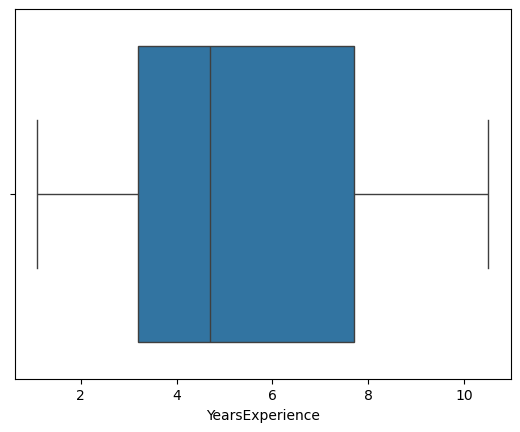

In [7]:
import seaborn as sns
sns.boxplot( x= 'YearsExperience', data=df)
#boxplot is used in EDA for finding outliers

In [8]:
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


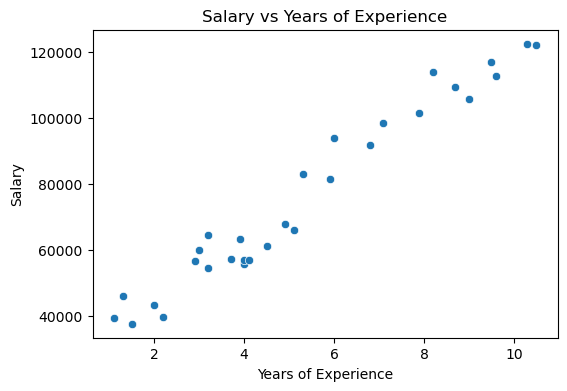

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()


In [10]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [11]:
# here now we will start to build model, for this we have to define input features and output feature(Target variebles)

# when there are more than one feature is available as input we go for taking all features as input
X=df[["YearsExperience"]]
# x = df.drop(columns=["Salary"],axis=1)

In [12]:
y = df.Salary

In [13]:
# calling the linear regression model
from sklearn.linear_model import LinearRegression

In [14]:
# creating object of model

model = LinearRegression()
model

LinearRegression()

In [15]:
# After calling the model we are going to split the dataset for training and testing

from sklearn.model_selection import train_test_split

In [16]:
# Splitting the data
X_train , X_test, y_train,y_test = train_test_split(X,y, test_size = .2,random_state = 42)

In [17]:
X_train.shape

(24, 1)

In [18]:
X_test.shape

(6, 1)

In [19]:
# After splitting the data into training and testing , now we are going to train the model on training data

model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [21]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64

In [22]:
model.predict([[6.3]])

C:\Users\RAMESHWARI\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84691.61954687])

In [23]:
m = model.coef_
c = model.intercept_

In [24]:
m

array([9423.81532303])

In [25]:
c

25321.583011776813

In [26]:
np.float64(25321.583011776813)

25321.583011776813

In [54]:
# compare with acual salaries (y_test)
print("Actual salaries :",y_test)
print("Predicted salaries :", y_pred)

Actual salaries : 27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64
Predicted salaries : [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [56]:
# Or create a comparison table 

results = pd.DataFrame(
    {
        'Actual' : y_test,
        'Predicted' : y_pred,
        'Difference' : y_test - y_pred
    }
)
print(results)

      Actual      Predicted    Difference
27  112635.0  115790.210113  -3155.210113
15   67938.0   71498.278095  -3560.278095
23  113812.0  102596.868661  11215.131339
17   83088.0   75267.804224   7820.195776
8    64445.0   55477.792045   8967.207955
9    57189.0   60189.699707  -3000.699707


In [58]:
accuracy_of_model = model.score(X,y)*100

In [60]:
accuracy_of_model

95.64379197293565

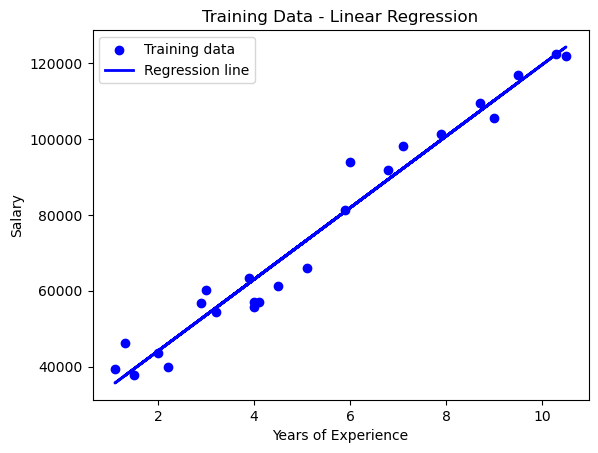

In [64]:
# AS we know that the model try to fit best fit line, so here we will create a plot which will show bestt fit line
# plt.figure(figsize = (12,6))

# plt.subplot(1,2,1)
plt.scatter(X_train, y_train, color='blue',label='Training data')
plt.plot(X_train , model.predict(X_train), color='blue', linewidth=2, label='Regression line')
plt.title('Training Data - Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test , y_pred)
print('Mean sq error :', mse)
r2 = r2_score(y_test,y_pred)
print("r2 score is: ",r2)
rmse = np.sqrt(mse)
print('root mse is :', rmse)

Mean sq error : 49830096.85590839
r2 score is:  0.9024461774180497
root mse is : 7059.04362190151
